In [4]:
import numpy as np
import pandas as pd

import matplotlib.pylab as plt
import seaborn as sns
#import pandas_profiling 
import seaborn as sns
from datetime import datetime

import lightgbm as lgb

import statsmodels.api as sm
from sklearn import model_selection
from sklearn import metrics
#from sklearn.cross_validation import train_test_split

from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
from sklearn import linear_model
from sklearn.ensemble import VotingRegressor

from sklearn.metrics import r2_score
from mlxtend.regressor import StackingCVRegressor

#?#from lightgbm import LGBMRegressor



In [5]:
# y_test = pd.read_csv("y_test.csv")
# X_test = pd.read_csv("X_test.csv")
# y_train = pd.read_csv("y_train.csv")
# X_train = pd.read_csv("X_train.csv")

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\User\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime', 'plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### импорт данных

In [7]:
train = pd.read_csv('train_done.csv')
test = pd.read_csv('test_done.csv')

In [8]:
train_X=train.drop(['Weekly_Sales','Date'], axis=1)
train_y=train['Weekly_Sales'] 
test_X=test.drop('Date',axis=1).copy()

train_X.shape, train_y.shape, test_X.shape

((421570, 18), (421570,), (115064, 18))

In [9]:
# разбили на обучение и тест обучающую выборку
X_train, X_test, y_train, y_test = model_selection.train_test_split(train_X, train_y, test_size=0.25)

# обучение

### RandomForest-случайный лес

In [10]:
clf_rf = RandomForestRegressor(max_features = 18, n_estimators = 600, n_jobs=-1)
#y_train.values.ravel()
clf_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=18, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=600, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [11]:
y_pred_rf=clf_rf.predict(X_test)
metric_rf = metrics.mean_absolute_error(y_test, y_pred_rf)
metric_sq_rf = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf))
print ('Средняя абсолютная ошибка:'+ str(metric_rf))
print ('Квадрат Среднего квадрата отклонения(RMSE):'+ str(metric_sq_rf))
score_rf = r2_score(y_test, y_pred_rf)
print('R2:'+ str(score_rf))

Средняя абсолютная ошибка:1282.690665744562
Квадрат Среднего квадрата отклонения(RMSE):2758.3481943980564
R2:0.9817595839524748


### DecisionTree - Дерево решений

In [14]:
clf_dt.get_params().keys()
# посмотрим какие параметры у нас вообще есть, какие можем подобрать

dict_keys(['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [15]:
clf_dt=DecisionTreeRegressor(max_depth= 25,  min_samples_leaf = 4, min_samples_split = 16)
clf_dt.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=25,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=4, min_samples_split=16,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [16]:
y_pred_dt= clf_dt.predict(X_test) #делаем предсказание
metric_dt = metrics.mean_absolute_error(y_test, y_pred_dt)
metric_sq_dt = np.sqrt(metrics.mean_squared_error(y_test, y_pred_dt))
print ('Средняя абсолютная ошибка:'+ str(metric_dt))
print ('Квадрат Среднего квадрата отклонения(RMSE):'+ str(metric_sq_dt))
score_dt = r2_score(y_test, y_pred_dt)
print('R2:'+ str(score_dt))

Средняя абсолютная ошибка:1573.9391860186417
Квадрат Среднего квадрата отклонения(RMSE):3460.785731470817
R2:0.9712865096297425


### BaggingReg - бэггинг

In [9]:
bag_clf.get_params().keys()

dict_keys(['base_estimator__ccp_alpha', 'base_estimator__criterion', 'base_estimator__max_depth', 'base_estimator__max_features', 'base_estimator__max_leaf_nodes', 'base_estimator__min_impurity_decrease', 'base_estimator__min_impurity_split', 'base_estimator__min_samples_leaf', 'base_estimator__min_samples_split', 'base_estimator__min_weight_fraction_leaf', 'base_estimator__presort', 'base_estimator__random_state', 'base_estimator__splitter', 'base_estimator', 'bootstrap', 'bootstrap_features', 'max_features', 'max_samples', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [11]:
bag_clf =  BaggingRegressor (
    DecisionTreeRegressor (), n_estimators=100 ,max_features = 18,  n_jobs = -1)
bag_clf.fit(X_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                      criterion='mse',
                                                      max_depth=None,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort='deprecated',
                                                      random_state=None,
                                                      splitter='best'),
                 bootstrap=T

In [13]:
y_pred_bag = bag_clf.predict(X_test ) 
metric_bag = metrics.mean_absolute_error(y_test, y_pred_bag)
metric_sq_bag = np.sqrt(metrics.mean_squared_error(y_test, y_pred_bag))
print ('Средняя абсолютная ошибка:'+ str(metric_bag))
print ('Квадрат Среднего квадрата отклонения(RMSE):'+ str(metric_sq_bag))
score_bag = r2_score(y_test, y_pred_bag)
print('R2:'+ str(score_bag))

Средняя абсолютная ошибка:1290.4654087140516
Квадрат Среднего квадрата отклонения(RMSE):2760.8215094928423
R2:0.9818616574339063


### ExtraTrees - особый лес

In [9]:
clf_ex = ExtraTreesRegressor (min_samples_leaf = 1, min_samples_split =5, n_estimators = 400) 
clf_ex.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=5, min_weight_fraction_leaf=0.0,
                    n_estimators=400, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [12]:
y_pred_ex= clf_ex.predict(X_test) 
metric_ex = metrics.mean_absolute_error(y_test, y_pred_ex) 
metric_sq_ex = np.sqrt(metrics.mean_squared_error(y_test, y_pred_ex))
print ('Средняя абсолютная ошибка:'+ str(metric_ex))
print ('Квадрат Среднего квадрата отклонения(RMSE):'+ str(metric_sq_ex))
score_ex = r2_score(y_test, y_pred_ex)
print('Квадрат Среднего квадрата отклонения(RMSE):'+ str(score_ex))

Средняя абсолютная ошибка:1261.3189659887278
Квадрат Среднего квадрата отклонения(RMSE):2709.5775647696773
0.9825388383830763


### AdaBoost

In [11]:
ada_clf = AdaBoostRegressor (DecisionTreeRegressor(), n_estimators=400, learning_rate=1.2, loss = 'linear')
ada_clf.fit(X_train, y_train)
#'base_estimator__max_depth': 15, 'learning_rate': 0.5, 'n_estimators': 200

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
               

In [13]:
y_pred_ada= ada_clf.predict(X_test) 
metric_ada = metrics.mean_absolute_error(y_test, y_pred_ada) 
metric_sq_ada = np.sqrt(metrics.mean_squared_error(y_test, y_pred_ada))
print ('Средняя абсолютная ошибка:'+ str(metric_ada))
print ('Квадрат Среднего квадрата отклонения(RMSE):' + str(metric_sq_ada))
score_ada = r2_score(y_test, y_pred_ada)
print(score_ada)

Средняя абсолютная ошибка:1242.6112455286404
Квадрат Среднего квадрата отклонения(RMSE):2678.0699053979683
0.9829425630353633


### xgboost - градиентный бустинг

In [7]:
xgb_clf = XGBRegressor(n_estimators= 600, max_depth= 15, subsample = 0.9, colsample_bytree = 0.8) 
xgb_clf = xgb_clf.fit(X_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[00:50:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [8]:
y_pred_xgb= xgb_clf.predict(X_test) 
metric_xgb = metrics.mean_absolute_error(y_test, y_pred_xgb) 
metric_sq_xgb = np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb))
print ('Средняя абсолютная ошибка:'+ str(metric_xgb))
print ('Квадрат Среднего квадрата отклонения(RMSE):' + str(metric_sq_xgb))
score_xgb = r2_score(y_test, y_pred_xgb)
print('Квадрат Среднего квадрата отклонения(RMSE):'+ str(score_xgb))

Средняя абсолютная ошибка:1133.657273713479
Квадрат Среднего квадрата отклонения(RMSE):2313.8924205457665
0.9872742881030935


## диаграммы рассеивания

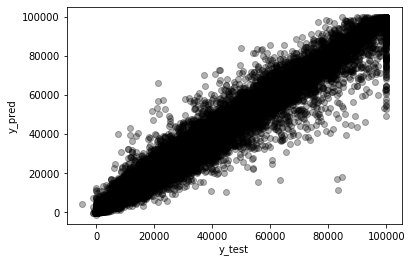

In [10]:
plt.scatter(y_test, y_pred_rf, c='black',alpha=0.3)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

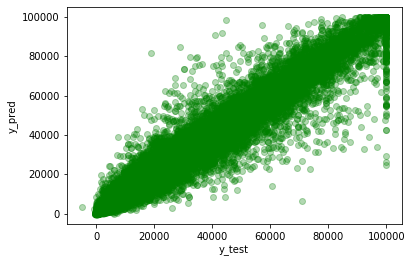

In [10]:
plt.scatter(y_test, y_pred_dt, c='green',alpha=0.3)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

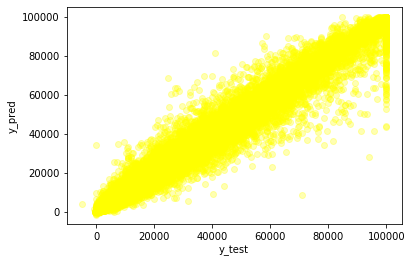

In [14]:
plt.scatter(y_test, y_pred_bag, c='yellow',alpha=0.3)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

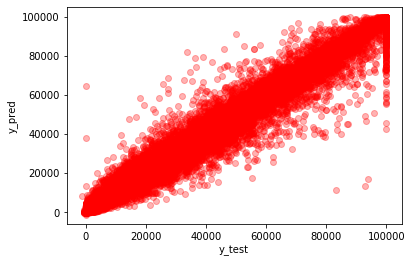

In [40]:
plt.scatter(y_test, y_pred_ex, c='red',alpha=0.3)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

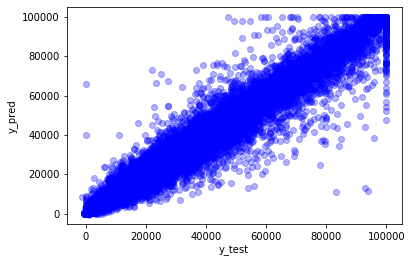

In [41]:
plt.scatter(y_test, y_pred_ada, c='blue',alpha=0.3)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

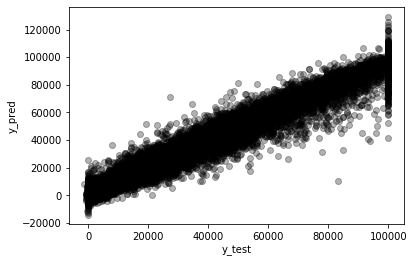

In [42]:
plt.scatter(y_test, y_pred_xgb, c='black',alpha=0.3)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

# система алгоритмов

In [10]:
xgb = XGBRegressor(n_estimators= 600, max_depth= 15, subsample = 0.9, colsample_bytree = 0.8)
exr = ExtraTreesRegressor (min_samples_leaf = 1, min_samples_split =5, n_estimators = 400)
ada = AdaBoostRegressor (DecisionTreeRegressor(), n_estimators=400, learning_rate=1.2, loss = 'linear')

In [12]:
stack_1 = StackingCVRegressor(regressors=(ada, exr, xgb),
                            meta_regressor=xgb, cv=12,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False,
                            random_state=100)
stack_1.fit(X_train, y_train)

[18:32:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:44:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:56:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:08:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:20:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:32:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:44:16] WARNI

StackingCVRegressor(cv=12,
                    meta_regressor=XGBRegressor(base_score=0.5,
                                                booster='gbtree',
                                                colsample_bylevel=1,
                                                colsample_bynode=1,
                                                colsample_bytree=0.8, gamma=0,
                                                importance_type='gain',
                                                learning_rate=0.1,
                                                max_delta_step=0, max_depth=15,
                                                min_child_weight=1,
                                                missing=None, n_estimators=600,
                                                n_jobs=1, nthread=None,
                                                objective='reg:linear',
                                                random_state=0, reg_alpha=0,
                                       

In [13]:
X_test.columns = ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17']
pred_stack_1 = stack_1.predict(X_test)
score = r2_score(y_test, pred_stack_1)

In [14]:
metric_stack_1 = metrics.mean_absolute_error(y_test, pred_stack_1) 
metric_sqrt_stack_1 = np.sqrt(metrics.mean_squared_error(y_test, pred_stack_1))
print ('Средняя абсолютная ошибка:'+ str(metric_stack_1))
print ('Квадрат Среднего квадрата отклонения(RMSE):' + str(metric_sqrt_stack_1))

Средняя абсолютная ошибка:1037.0842480876702
Квадрат Среднего квадрата отклонения(RMSE):2153.2499475329114


In [15]:
score

0.9888365568442585

In [15]:
stack_2 = StackingCVRegressor(regressors=(rf, exr, ada),
                            meta_regressor=ada, cv=12,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False,
                            random_state=100)
stack_2.fit(X_train, y_train)

StackingCVRegressor(cv=12,
                    meta_regressor=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                                                          criterion='mse',
                                                                                          max_depth=None,
                                                                                          max_features=None,
                                                                                          max_leaf_nodes=None,
                                                                                          min_impurity_decrease=0.0,
                                                                                          min_impurity_split=None,
                                                                                          min_samples_leaf=1,
                                                                                          min

In [18]:
X_test.columns = ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17']
pred_stack_2 = stack_2.predict(X_test)
score = r2_score(y_test, pred_stack_2)

In [19]:
metric_stack_2 = metrics.mean_absolute_error(y_test, pred_stack_2) 
metric_sqrt_stack_2 = np.sqrt(metrics.mean_squared_error(y_test, pred_stack_2))
print ('Средняя абсолютная ошибка:'+ str(metric_stack_2))
print ('Квадрат Среднего квадрата отклонения(RMSE):' + str(metric_sqrt_stack_2))

Средняя абсолютная ошибка:1194.6823029043676
Квадрат Среднего квадрата отклонения(RMSE):2574.8188449960276


In [20]:
score

0.9840564485529977

# сетка RandomForestRegressor()


In [12]:
clf_rf = RandomForestRegressor()

In [8]:
clf_rf.get_params().keys()
# посмотрим какие параметры у нас вообще есть, какие можем подобрать

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [13]:
parameters_grid = { # Random Forest 
        'n_estimators':[200, 400, 600],
        'max_features':[10, 15, 18]}

In [14]:
grid_cv = model_selection.GridSearchCV(
        estimator=clf_rf,
        param_grid=parameters_grid, 
        n_jobs=-1, 
        scoring='neg_mean_squared_error',
        verbose=2
    )

In [15]:
fitted_model = grid_cv.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 91.8min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 155.6min finished


In [16]:
print (grid_cv.best_score_)
print (grid_cv.best_params_)

-8492267.849015722
{'max_features': 18, 'n_estimators': 200}


In [17]:
clf_rf = RandomForestRegressor(max_features = 18, n_estimators = 200, n_jobs=-1)
clf_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=18, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [18]:
y_pred_rf=clf_rf.predict(X_test)
metric_rf = metrics.mean_absolute_error(y_test, y_pred_rf)
metric_sq_rf = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf))
print ('Средняя абсолютная ошибка:'+ str(metric_rf))
print ('Квадрат Среднего квадрата отклонения(RMSE):'+ str(metric_sq_rf))

Средняя абсолютная ошибка:1293.0261765515736
Квадрат Среднего квадрата отклонения(RMSE):2790.1285851149933


In [22]:
metrics.SCORERS.keys()1273

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [38]:
abs(y_pred_rf - y_test)

161758     1135.387486
324018     1794.483163
58262      1310.678472
280333     3391.076873
350936      153.025469
              ...     
161276     1737.509632
255132    14920.010141
272770     1703.394737
286385     1140.542431
323844     1698.471872
Name: Weekly_Sales, Length: 105393, dtype: float64

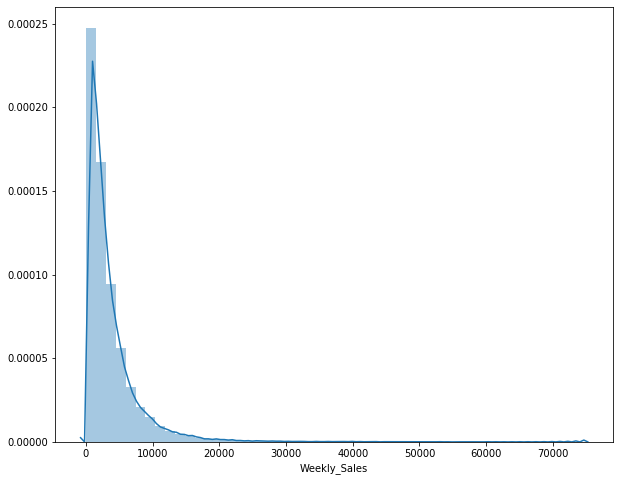

In [40]:
from IPython.core.pylabtools import figsize
figsize(10,8)
sns_plot = sns.distplot(abs(y_pred_rf - y_test))
fig = sns_plot.get_figure()

# сетка XGBRegressor() 

In [11]:
xgb_clf = XGBRegressor() 

In [12]:
xgb_clf.get_params().keys()

dict_keys(['base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'gamma', 'importance_type', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'n_estimators', 'n_jobs', 'nthread', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'seed', 'silent', 'subsample', 'verbosity'])

In [13]:
grid_parameters_xgb = { # XGBoost
        'n_estimators': [400, 600],
        'colsample_bytree': [0.7, 0.8],
        'max_depth': [15, 20, 25],
        'subsample': [0.7, 0.8, 0.9]}

In [14]:
grid_xgb = model_selection.GridSearchCV(
        estimator=xgb_clf,
        param_grid=grid_parameters_xgb, 
        n_jobs=-1, 
        scoring='neg_mean_squared_error',
        verbose=2
    )

In [15]:
fitted_model = grid_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 104.8min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 662.4min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 841.3min finished
C:\Users\User\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:53:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [18]:
print (grid_xgb.best_score_)
print (grid_xgb.best_params_)

-5560634.805464836
{'colsample_bytree': 0.8, 'max_depth': 15, 'n_estimators': 600, 'subsample': 0.9}


In [19]:
xgb_clf = XGBRegressor(n_estimators= 600, max_depth= 15, subsample = 0.9, colsample_bytree = 0.8) 
xgb_clf = xgb_clf.fit(X_train, y_train)

[14:09:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [20]:
y_pred_xgb= xgb_clf.predict(X_test) 
metric_xgb = metrics.mean_absolute_error(y_test, y_pred_xgb) 
metric_sq_xgb = np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb))
print ('Средняя абсолютная ошибка:'+ str(metric_xgb))
print ('Квадрат Среднего квадрата отклонения(RMSE):' + str(metric_sq_xgb))

Средняя абсолютная ошибка:1131.3820696834568
Квадрат Среднего квадрата отклонения(RMSE):2275.3812155669702


# сетка DecisionTreeRegressor()

In [ ]:
max_depth= 25,  min_samples_leaf = 4, min_samples_split = 16

In [43]:
clf_dt=DecisionTreeRegressor()

In [44]:
grid_parameters_dt = { # DecisionTree
        'min_samples_split': [13, 16, 20],
        'min_samples_leaf': [4, 5, 6, 7],
        'max_depth': [15, 20, 25]}

In [47]:
grid_dt = model_selection.GridSearchCV(
        estimator=clf_dt,
        param_grid=grid_parameters_dt, 
        n_jobs=-1, 
        scoring='neg_mean_squared_error',
        verbose=2
    )

In [48]:
fitted_model = grid_dt.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   47.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  2.8min finished


In [51]:
print (grid_dt.best_score_)
print (grid_dt.best_params_)

-13110923.24986887
{'max_depth': 25, 'min_samples_leaf': 5, 'min_samples_split': 13}


In [52]:
clf_dt=DecisionTreeRegressor(max_depth= 25,  min_samples_leaf = 5, min_samples_split = 13)
clf_dt.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=25,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=13,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [53]:
y_pred_dt= clf_dt.predict(X_test) #делаем предсказание
metric_dt = metrics.mean_absolute_error(y_test, y_pred_dt)
metric_sq_dt = np.sqrt(metrics.mean_squared_error(y_test, y_pred_dt))
print ('Средняя абсолютная ошибка:'+ str(metric_dt))
print ('Квадрат Среднего квадрата отклонения(RMSE):'+ str(metric_sq_dt))

Средняя абсолютная ошибка:1583.3015773543248
Квадрат Среднего квадрата отклонения(RMSE):3446.7478970254697


# Сетка AdaBoostRegressor

In [18]:
ada_clf.get_params().keys()

dict_keys(['base_estimator__ccp_alpha', 'base_estimator__criterion', 'base_estimator__max_depth', 'base_estimator__max_features', 'base_estimator__max_leaf_nodes', 'base_estimator__min_impurity_decrease', 'base_estimator__min_impurity_split', 'base_estimator__min_samples_leaf', 'base_estimator__min_samples_split', 'base_estimator__min_weight_fraction_leaf', 'base_estimator__presort', 'base_estimator__random_state', 'base_estimator__splitter', 'base_estimator', 'learning_rate', 'loss', 'n_estimators', 'random_state'])

In [7]:
ada_clf = AdaBoostRegressor (DecisionTreeRegressor())
#ada_clf.fit (X_train, y_train ) 

In [8]:
grid_parameters_ada = { # adaboost
        'n_estimators': [200, 400],
        'learning_rate': [0.5, 0.8, 1, 1.2],}

In [9]:
grid_ada = model_selection.GridSearchCV(
        estimator=ada_clf,
        param_grid=grid_parameters_ada, 
        n_jobs=-1, 
        scoring='neg_mean_squared_error',
        verbose=2
    )

In [1]:
fitted_model = grid_ada.fit(X_train, y_train)

In [22]:
print (grid_ada.best_score_)
print (grid_ada.best_params_)

-10424442.53254722
{'base_estimator__max_depth': 15, 'learning_rate': 0.5, 'n_estimators': 200}


In [36]:
ada_clf = AdaBoostRegressor (DecisionTreeRegressor(), learning_rate = 0.5, n_estimators = 400)

In [18]:
ada_clf.fit (X_train, y_train )

In [ ]:
y_pred_ada= ada_clf.predict(X_test) 
metric_ada = metrics.mean_absolute_error(y_test, y_pred_ada) 
metric_sq_ada = np.sqrt(metrics.mean_squared_error(y_test, y_pred_ada))
print ('Средняя абсолютная ошибка:'+ str(metric_ada))
print ('Квадрат Среднего квадрата отклонения(RMSE):' + str(metric_sq_ada))
#score_ada = r2_score(y_test, y_pred_ada)
#print(score_ada)

In [8]:
clf_ex.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

# сетка ExtraTrees

In [7]:
clf_ex = ExtraTreesRegressor ()


In [8]:
grid_parameters_ex = { # Extratree
        'n_estimators':[200, 400],
        'min_samples_split': [2, 5, 7],
        'min_samples_leaf': [1, 3, 5]}

In [9]:
grid_ex = model_selection.GridSearchCV(
        estimator=clf_ex,
        param_grid=grid_parameters_ex, 
        n_jobs=-1, 
        scoring='neg_mean_squared_error',
        verbose=2
    )

In [10]:
fitted_model = grid_ex.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 61.3min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 158.4min finished


In [11]:

print (grid_ex.best_params_)

{'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 400}


In [12]:
clf_ex = ExtraTreesRegressor (min_samples_leaf = 1, min_samples_split =5, n_estimators = 400)

In [13]:
clf_ex.fit (X_train, y_train )

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=5, min_weight_fraction_leaf=0.0,
                    n_estimators=400, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [14]:
y_pred_ex= clf_ex.predict(X_test) 
metric_ex = metrics.mean_absolute_error(y_test, y_pred_ex) 
metric_sq_ex = np.sqrt(metrics.mean_squared_error(y_test, y_pred_ex))
print ('Средняя абсолютная ошибка:'+ str(metric_ex))
print ('Квадрат Среднего квадрата отклонения(RMSE):'+ str(metric_sq_ex))
score_ex = r2_score(y_test, y_pred_ex)
print(score_ex)

Средняя абсолютная ошибка:1275.9867351641
Квадрат Среднего квадрата отклонения(RMSE):2781.8240987005984
0.9814807186357324
